Classification Accuracy: 0.65
Regression Mean Squared Error: 167.79


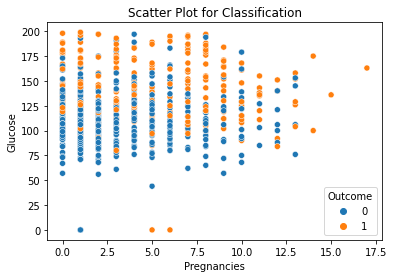

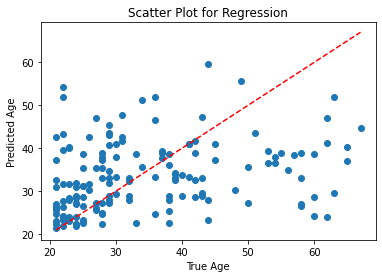

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

Classification Accuracy: 0.65


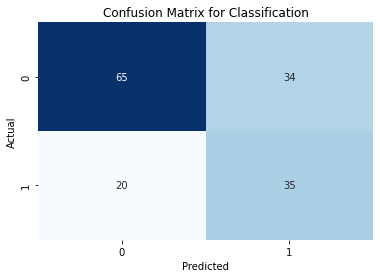

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.66      0.71        99
           1       0.51      0.64      0.56        55

    accuracy                           0.65       154
   macro avg       0.64      0.65      0.64       154
weighted avg       0.67      0.65      0.66       154



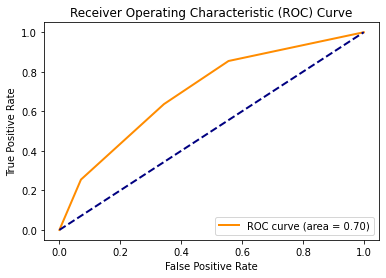

Regression Mean Squared Error: 167.79


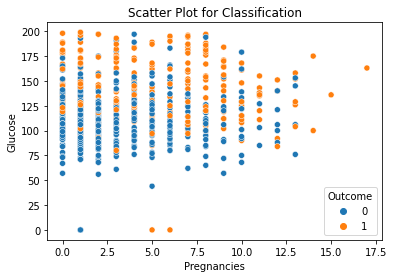

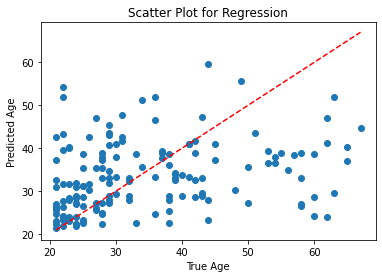

In [2]:
data_path = 'diabetes.csv'
df = pd.read_csv(data_path)

In [ ]:
X_classification = df.drop('Outcome', axis=1)
y_classification = df['Outcome']

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_class, y_train_class)

y_pred_class = knn_classifier.predict(X_test_class)

accuracy_class = accuracy_score(y_test_class, y_pred_class)
print(f'Classification Accuracy: {accuracy_class:.2f}')

In [ ]:
cm = confusion_matrix(y_test_class, y_pred_class)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Classification')
plt.show()

print('Classification Report:')
print(classification_report(y_test_class, y_pred_class))

In [ ]:
if len(np.unique(y_classification)) == 2:
    from sklearn.metrics import roc_curve, auc

    fpr, tpr, _ = roc_curve(y_test_class, knn_classifier.predict_proba(X_test_class)[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
X_regression = df.drop('Age', axis=1)
y_regression = df['Age']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42
)

knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train_reg, y_train_reg)

y_pred_reg = knn_regressor.predict(X_test_reg)

mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
print(f'Regression Mean Squared Error: {mse_reg:.2f}')

sns.scatterplot(x='Pregnancies', y='Glucose', hue='Outcome', data=df)
plt.title('Scatter Plot for Classification')
plt.show()

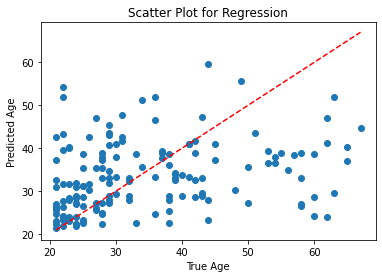

In [4]:
plt.scatter(y_test_reg, y_pred_reg)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], linestyle='--', color='red')
plt.xlabel('True Age')
plt.ylabel('Predicted Age')
plt.title('Scatter Plot for Regression')
plt.show()
